# Lab 8 - PyTorch

In [ ]:
!git clone https://github.com/pytorch/audio.git

Cloning into 'audio'...


### Tensors

In [ ]:
import torch

# Create a tensor
tensor = torch.tensor([[1, 2], [3, 4]])
print(tensor)

tensor([[1, 2],
        [3, 4]])


### Operations

In [ ]:
# Addition
tensor_add = tensor + 5
print(tensor_add)

# Multiplication
tensor_mul = tensor * 2
print(tensor_mul)

tensor([[6, 7],
        [8, 9]])
tensor([[2, 4],
        [6, 8]])


### Autograd

In [ ]:
# Create tensors with requires_grad=True to track computation
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
z = y * y * 3
out = z.mean()

# Compute gradients
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In backpropagation, gradients show how much a small change in each parameter affects the overall error of the model. They help adjust the parameters to minimize this error. Think of gradients like a compass pointing towards the direction of improvement. During training, we calculate these gradients and use them to update the parameters, making the model better at its task.

### Building a Simple Model

In [ ]:
# Define a linear model
model = torch.nn.Linear(1, 1)

# Loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

The inputs provided in torch.nn.Linear are:

    Input Features (in_features): This parameter specifies the size of each input sample. In the context of a linear layer, it represents the number of input features or dimensions. For example, if each input sample has 3 features, then in_features=3.

    Output Features (out_features): This parameter specifies the size of the output tensor. It represents the number of output features or dimensions. For example, if we want the linear layer to produce output with 2 features, then out_features=2.

## Implement a Multi-Layer Neural Network with PyTorch

### Task 1: Generate Synthetic Data

In [1]:
import torch
import numpy as np

# Generating a spiral dataset
N = 100  # number of points per class
D = 2  # dimensionality
K = 2  # number of classes
X = np.zeros((N*K, D))  # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8')  # class labels

for j in range(K):
  ix = range(N*j, N*(j+1))
  r = np.linspace(0.0, 1, N)  # radius
  t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2  # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

X = torch.from_numpy(X).float()
y = torch.from_numpy(y).long()

### Task 2: Define the Model

In [2]:
# Define a simple multi-layer network
model = torch.nn.Sequential(
    torch.nn.Linear(2, 100),  # 2 inputs, to 100 neurons in the first hidden layer
    torch.nn.ReLU(),
    torch.nn.Linear(100, 50),  # Second hidden layer, 50 neurons
    torch.nn.ReLU(),
    torch.nn.Linear(50, 2)  # Output layer, 2 outputs for our classes
)

# Loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

### Task 3: Train the Model

In [3]:
# Train the model
# Training loop
for epoch in range(1000):
    # Forward pass: Compute predicted y
    y_pred = model(X)

    # Compute loss
    loss = criterion(y_pred, y)

    # Zero gradients, backward pass, and update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: loss = {loss.item()}')

Epoch 0: loss = 0.7053931951522827
Epoch 100: loss = 0.013550070114433765
Epoch 200: loss = 0.008775796741247177
Epoch 300: loss = 0.007776860147714615
Epoch 400: loss = 0.007469862699508667
Epoch 500: loss = 0.00737069733440876
Epoch 600: loss = 0.007150816265493631
Epoch 700: loss = 0.007104319520294666
Epoch 800: loss = 0.007064419332891703
Epoch 900: loss = 0.00702885864302516


### Task 4: Evaluate the Model

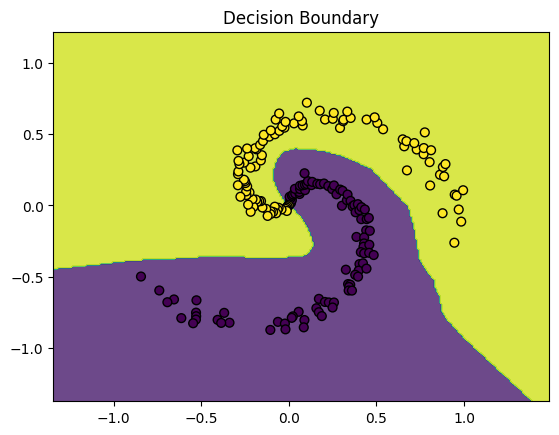

In [4]:
# We will use matplotlib to plot the decision boundary
import matplotlib.pyplot as plt

def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Model prediction for a numpy array
def predict(X):
    X = torch.from_numpy(X).float()
    y_pred = model(X)
    return np.argmax(y_pred.data.numpy(), axis=1)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(x))
plt.title("Decision Boundary")
plt.show()